Número de peluqueros (1-10): 3
Número de clientes a simular (1-100): 100
¡Bienvenido a la Simulación de Peluquería!

Por favor, ingrese los parámetros para la simulación:

Ejecutando simulación...

     SIMULACIÓN DE PELUQUERÍA

Detalles de la simulación:
- Número de clientes: 100 
- Número de peluqueros: 3 
- Tiempo de espera promedio: 40.69 minutos
- Tiempo de servicio promedio: 17.73 minutos
- Clientes en espera promedio: 9.52 
- Ocio de peluqueros promedio: 0.21 minutos

Resultados detallados:


| cliente | rLlegada | tiempoEntreLlegadas | horaLlegada | horaInicioServicio | rServicio | tiempoServicio |  peluquero  | horaFinServicio | tiempoEspera | ocioPeluquero | clientesEnEspera |
|:-------:|:--------:|:-------------------:|:-----------:|:------------------:|:---------:|:--------------:|:-----------:|:---------------:|:------------:|:-------------:|:----------------:|
|    1    |  0.2947  |        0.00         |    09:00    |       09:00        |  0.8306   |     24.92      | Pelu

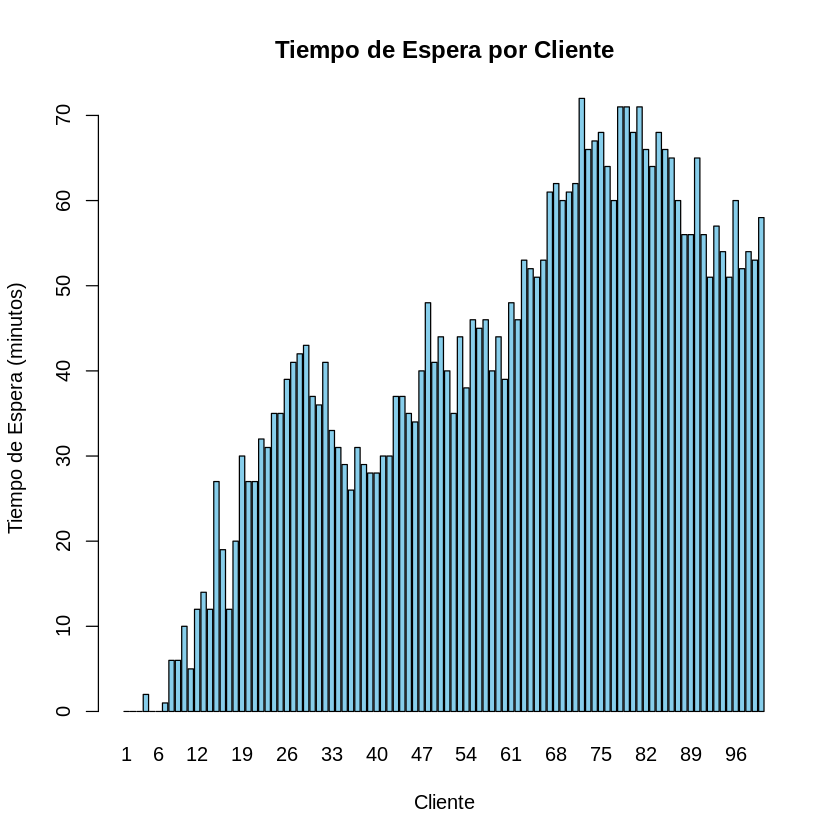

In [8]:
# Simulación de Peluquería en R
# Script mejorado con formato camelCase y UpperCamelCase

# Carga de bibliotecas necesarias
library(lubridate)
library(knitr)

#' @title SimulacionPeluqueria
#' @description Función principal para simular una peluquería con múltiples peluqueros
#' @param numClientes Número de clientes a simular
#' @param numPeluqueros Número de peluqueros disponibles
#' @return Un data.frame con los resultados de la simulación
SimulacionPeluqueria <- function(numClientes = 10, numPeluqueros = 3) {
  # Configuración inicial
  horaInicial <- as.POSIXct("09:00", format = "%H:%M")

  # Generadores aleatorios
  GenerarRLlegada <- function() {
    return(round(runif(1, min = 0.01, max = 1), 4))
  }

  GenerarRServicio <- function() {
    return(round(runif(1, min = 0.2, max = 1), 4))
  }

  CalcularTiempoEntreLlegadas <- function(rLlegada) {
    return(round(rLlegada * 10, 2))
  }

  CalcularTiempoServicio <- function(rServicio) {
    return(round(rServicio * 30, 2))
  }

  # Inicialización
  clientes <- data.frame(
    cliente = integer(numClientes),
    rLlegada = numeric(numClientes),
    tiempoEntreLlegadas = numeric(numClientes),
    horaLlegada = character(numClientes),
    horaInicioServicio = character(numClientes),
    rServicio = numeric(numClientes),
    tiempoServicio = numeric(numClientes),
    peluquero = character(numClientes),
    horaFinServicio = character(numClientes),
    tiempoEspera = numeric(numClientes),
    ocioPeluquero = numeric(numClientes),
    clientesEnEspera = integer(numClientes),
    stringsAsFactors = FALSE
  )

  llegadas <- vector("list", numClientes)
  salidas <- vector("list", numClientes)

  peluqueros <- data.frame(
    id = 1:numPeluqueros,
    libreA = rep(horaInicial, numPeluqueros)
  )

  for (i in 1:numClientes) {
    rLlegada <- GenerarRLlegada()
    rServicio <- GenerarRServicio()

    if (i == 1) {
      llegadaDt <- horaInicial
      tiempoLlegada <- 0
    } else {
      tiempoLlegada <- CalcularTiempoEntreLlegadas(rLlegada)
      llegadaDt <- llegadas[[i-1]] + tiempoLlegada * 60
    }

    llegadas[[i]] <- llegadaDt

    indicePeluqueroMasLibre <- which.min(peluqueros$libreA)
    inicioServicioDt <- max(llegadaDt, peluqueros$libreA[indicePeluqueroMasLibre])

    tiempoEspera <- difftime(inicioServicioDt, llegadaDt, units = "mins")
    ocioPeluquero <- difftime(llegadaDt, peluqueros$libreA[indicePeluqueroMasLibre], units = "mins")
    tiempoEspera <- max(as.numeric(tiempoEspera), 0)
    ocioPeluquero <- max(as.numeric(ocioPeluquero), 0)

    tiempoServ <- CalcularTiempoServicio(rServicio)
    finServicioDt <- inicioServicioDt + tiempoServ * 60
    salidas[[i]] <- finServicioDt

    peluqueros$libreA[indicePeluqueroMasLibre] <- finServicioDt

    # CORRECCIÓN APLICADA AQUÍ
    clientesEnSistema <- 0
    if (i > 1) {
      for (j in 1:(i-1)) {
        if (!is.null(salidas[[j]]) && salidas[[j]] > llegadaDt) {
          clientesEnSistema <- clientesEnSistema + 1
        }
      }
    }

    clientes$cliente[i] <- i
    clientes$rLlegada[i] <- rLlegada
    clientes$tiempoEntreLlegadas[i] <- tiempoLlegada
    clientes$horaLlegada[i] <- format(llegadaDt, "%H:%M")
    clientes$horaInicioServicio[i] <- format(inicioServicioDt, "%H:%M")
    clientes$rServicio[i] <- rServicio
    clientes$tiempoServicio[i] <- tiempoServ
    clientes$peluquero[i] <- paste("Peluquero", peluqueros$id[indicePeluqueroMasLibre])
    clientes$horaFinServicio[i] <- format(finServicioDt, "%H:%M")
    clientes$tiempoEspera[i] <- round(tiempoEspera)
    clientes$ocioPeluquero[i] <- round(ocioPeluquero)
    clientes$clientesEnEspera[i] <- clientesEnSistema
  }

  return(clientes)
}

#' @title MostrarResultados
#' @description Muestra los resultados de la simulación con formato mejorado
#' @param datos Data.frame con los resultados de la simulación
#' @param numPeluqueros Número de peluqueros en la simulación
MostrarResultados <- function(datos, numPeluqueros) {
  # Calcular estadísticas
  tiempoEsperaPromedio <- mean(datos$tiempoEspera)
  tiempoServicioPromedio <- mean(datos$tiempoServicio)
  clientesEsperaPromedio <- mean(datos$clientesEnEspera)
  ocioPeluqueroPromedio <- mean(datos$ocioPeluquero)

  # Imprimir encabezado
  cat("\n===================================================\n")
  cat("     SIMULACIÓN DE PELUQUERÍA\n")
  cat("===================================================\n\n")

  cat("Detalles de la simulación:\n")
  cat(paste("- Número de clientes:", nrow(datos), "\n"))
  cat(paste("- Número de peluqueros:", numPeluqueros, "\n"))
  cat(paste("- Tiempo de espera promedio:", round(tiempoEsperaPromedio, 2), "minutos\n"))
  cat(paste("- Tiempo de servicio promedio:", round(tiempoServicioPromedio, 2), "minutos\n"))
  cat(paste("- Clientes en espera promedio:", round(clientesEsperaPromedio, 2), "\n"))
  cat(paste("- Ocio de peluqueros promedio:", round(ocioPeluqueroPromedio, 2), "minutos\n\n"))

  # Mostrar tabla de resultados
  cat("Resultados detallados:\n")
  print(knitr::kable(datos, align = "c", row.names = FALSE))

  # Crear gráfico de barras para tiempos de espera
  if (require(graphics)) {
    barplot(datos$tiempoEspera,
            names.arg = datos$cliente,
            col = "skyblue",
            main = "Tiempo de Espera por Cliente",
            xlab = "Cliente",
            ylab = "Tiempo de Espera (minutos)")
  }

  cat("\n===================================================\n")
  cat("     FIN DE LA SIMULACIÓN\n")
  cat("===================================================\n")
}

# Función principal que interactúa con el usuario
EjecutarSimulacion <- function() {
  cat("¡Bienvenido a la Simulación de Peluquería!\n\n")

  # Solicitar parámetros al usuario
  cat("Por favor, ingrese los parámetros para la simulación:\n")
  numPeluqueros <- as.integer(readline("Número de peluqueros (1-10): "))
  numClientes <- as.integer(readline("Número de clientes a simular (1-100): "))

  # Validar entradas
  if (is.na(numPeluqueros) || numPeluqueros < 1 || numPeluqueros > 10) {
    cat("Entrada inválida. Usando 3 peluqueros por defecto.\n")
    numPeluqueros <- 3
  }

  if (is.na(numClientes) || numClientes < 1 || numClientes > 100) {
    cat("Entrada inválida. Usando 10 clientes por defecto.\n")
    numClientes <- 10
  }

  # Ejecutar simulación
  cat("\nEjecutando simulación...\n")
  resultados <- SimulacionPeluqueria(numClientes, numPeluqueros)

  # Mostrar resultados
  MostrarResultados(resultados, numPeluqueros)

  return(resultados)
}

# Ejecutar la simulación
set.seed(123)  # Para reproducibilidad
resultados <- EjecutarSimulacion()

# También puedes guardar los resultados si lo deseas
# write.csv(resultados, "resultados_simulacion_peluqueria.csv", row.names = FALSE)
